In [ ]:
#imports
import fuckit
fuckit('re');#importing regex
fuckit('os');#importing os
fuckit('nltk'); #import nlkt
fuckit('collections'); #import collections
fuckit("seaborn") #import seaborn
fuckit("pickle") #import pickle
fuckit('difflib')#import difflib
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import Counter
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

## Tokenizer

### Hate Speech Data

In [ ]:
path=os.getcwd()
path=path[:-9]+'data/'+'hate/'+'train_text.txt'
hatetraintext=[] # The outmost list is equal to the textfile, each sublist corresponds to a line in the file.
loadeddata=open(path,'r')
for i in loadeddata: 
    text=re.findall(r'[A-Za-z]+\'[A-Za-z]+|\w+|#[A-Za-z0-9]+|@[A-Za-z0-9]+|../..',i)
    tochange=[]
    for j in range(len(text)-1):
        if text[j][0]=='#' and text[j+1][0]!='#':
            tochange.append(text[j])
        if text[j][0]=='@':# making all the @mentions the same
            text[j]='@'
    for j in tochange:
        text[text.index(j)]=text[text.index(j)][1:]
    hatetraintext.append(text)
loadeddata.close()

## Testing default tokenizer

In [ ]:
path=os.getcwd()
path=path[:-9]+'data/'+'hate/'+'test_text.txt'
hatetesttext=[] # The outmost list is equal to the textfile, each sublist corresponds to a line in the file.
loadeddata=open(path,'r')
for i in loadeddata: 
    text=re.findall(r'[A-Za-z]+\'[A-Za-z]+|\w+|#[A-Za-z0-9]+|@[A-Za-z0-9]+|../..',i)
    tochange=[]
    for j in range(len(text)-1):
        if text[j][0]=='#' and text[j+1][0]!='#':
            tochange.append(text[j])
        if text[j][0]=='@':# making all the @mentions the same
            text[j]='@'
    for j in tochange:
        text[text.index(j)]=text[text.index(j)][1:]
    hatetesttext.append(text)
loadeddata.close()

In [ ]:
path=os.getcwd()
path=path[:-9]+'data/'+'hate/'+'test_text.txt'
defhatetesttext=[] # The outmost list is equal to the textfile, each sublist corresponds to a line in the file.
tknzr=TweetTokenizer()
loadeddata=open(path,'r')
for i in loadeddata:
    text=tknzr.tokenize(i)
    defhatetesttext.append(text)
loadeddata.close()

In [ ]:
allhatetest=set()
for i in hatetesttext:
    for j in i:
        allhatetest.add(j)
allhatetest=list(allhatetest)
alldefhatetest=set()
for i in defhatetesttext:
    for j in i:
        alldefhatetest.add(j)
alldefhatetest=list(alldefhatetest)

In [ ]:
diff=difflib.SequenceMatcher(None,allhatetest,alldefhatetest)
diff.ratio()

0.9191534113316682

# -----------

In [ ]:
path=os.getcwd()#getting the labels 
path=path[:-9]+'data/'+'hate/'+'train_labels.txt'
hatetrainlabels=[]
loadeddata=open(path,'r')
for i in loadeddata:
    hatetrainlabels.append(i.strip())
loadeddata.close()

In [ ]:
#Loading in the validation
path=os.getcwd()
path=path[:-9]+'data/'+'hate/'+'val_text.txt'
hatevaltext=[] # The outmost list is equal to the textfile, each sublist corresponds to a line in the file.
loadeddata=open(path,'r')
for i in loadeddata: 
    text=re.findall(r'[A-Za-z]+\'[A-Za-z]+|\w+|#[A-Za-z0-9]+|@[A-Za-z0-9]+|../..',i)
    tochange=[]
    for j in range(len(text)-1):
        if text[j][0]=='#' and text[j+1][0]!='#':
            tochange.append(text[j])
        if text[j][0]=='@':# making all the @mentions the same
            text[j]='@'
    for j in tochange:
        text[text.index(j)]=text[text.index(j)][1:]
    hatevaltext.append(text)
loadeddata.close()

In [ ]:
path=os.getcwd()#getting the labels 
path=path[:-9]+'data/'+'hate/'+'val_labels.txt'
hatevallabels=[]
loadeddata=open(path,'r')
for i in loadeddata:
    hatevallabels.append(i.strip())
loadeddata.close()

### Sentiment Data

In [ ]:
path=os.getcwd()
path=path[:-9]+'data/'+'sentiment/'+'train_text.txt'
senttraintext=[] # The outmost list is equal to the textfile, each sublist corresponds to a line in the file.
loadeddata=open(path,'r')
for i in loadeddata: 
    text=re.findall(r'[A-Za-z]+\'[A-Za-z]+|\w+|#[A-Za-z0-9]+|@[A-Za-z0-9]+|../..',i)
    tochange=[]
    for j in range(len(text)-1):
        if text[j][0]=='#' and text[j+1][0]!='#':
            tochange.append(text[j])
        if text[j][0]=='@':# making all the @mentions the same
            text[j]='@'
    for j in tochange:
        text[text.index(j)]=text[text.index(j)][1:]
    senttraintext.append(text)
loadeddata.close()

In [ ]:
path=os.getcwd()#getting the labels 
path=path[:-9]+'data/'+'sentiment/'+'train_labels.txt'
senttrainlabels=[]
loadeddata=open(path,'r')
for i in loadeddata:
    senttrainlabels.append(i.strip())
loadeddata.close()

In [ ]:
#Loading in the validation
path=os.getcwd()
path=path[:-9]+'data/'+'sentiment/'+'val_text.txt'
sentvaltext=[] # The outmost list is equal to the textfile, each sublist corresponds to a line in the file.
loadeddata=open(path,'r')
for i in loadeddata: 
    text=re.findall(r'[A-Za-z]+\'[A-Za-z]+|\w+|#[A-Za-z0-9]+|@[A-Za-z0-9]+|../..',i)
    tochange=[]
    for j in range(len(text)-1):
        if text[j][0]=='#' and text[j+1][0]!='#':
            tochange.append(text[j])
        if text[j][0]=='@':# making all the @mentions the same
            text[j]='@'
    for j in tochange:
        text[text.index(j)]=text[text.index(j)][1:]
    sentvaltext.append(text)
loadeddata.close()

In [ ]:
path=os.getcwd()#getting the labels 
path=path[:-9]+'data/'+'sentiment/'+'val_labels.txt'
sentvallabels=[]
loadeddata=open(path,'r')
for i in loadeddata:
    sentvallabels.append(i.strip())
loadeddata.close()

In [ ]:
#Comparing the perplexities of the two models
val,whatever=padded_everygram_pipeline(4,hatevaltext)
hatevalgrams=[list(x) for x in val]
hatevals=[]
for i in hatevalgrams:
    for j in i:
        hatevals.append(j)

# Task 2: Characterising Your Data

## Hatespeech

Corpus and Vocab

### Zipf Law Plot

In [ ]:
# This is how we generated vocabs
# voc=collections.Counter()
# for i in hatetraintext:
#     voc=voc+collections.Counter(i)

In [ ]:
voc=collections.Counter(json.load(open('voc.json')))

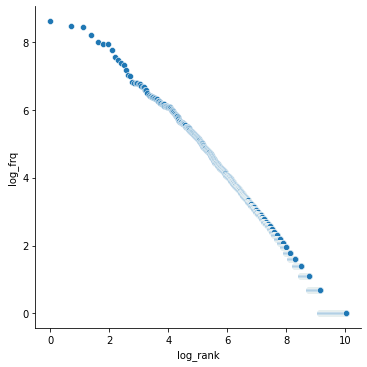

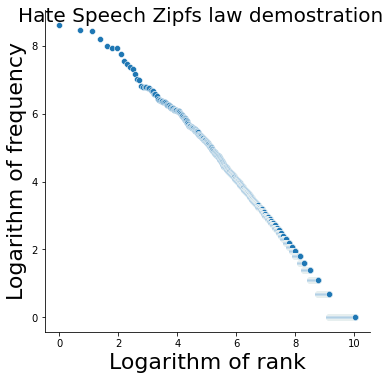

In [ ]:
frq = pd.DataFrame(voc.most_common(), columns=['token', 'frequency'])

# Index in the sorted list
frq['idx'] = frq.index + 1

# Plot: Log-log plot for Zipf's law
frq['log_frq'] = np.log(frq.frequency)
frq['log_rank'] = np.log(frq['idx'])
seaborn.relplot(x='log_rank', y='log_frq', data=frq);
ax=seaborn.relplot(x='log_rank', y='log_frq', data=frq);
ax.fig.suptitle('Hate Speech Zipfs law demostration',fontsize=20)
ax.set_xlabels('Logarithm of rank',fontsize=22)
ax.set_ylabels('Logarithm of frequency',fontsize=22)


In [ ]:
hate_corpus = len(hatetraintext)
print("Hate Corpus:",hate_corpus)

Hate Corpus: 9000


## Sentiment

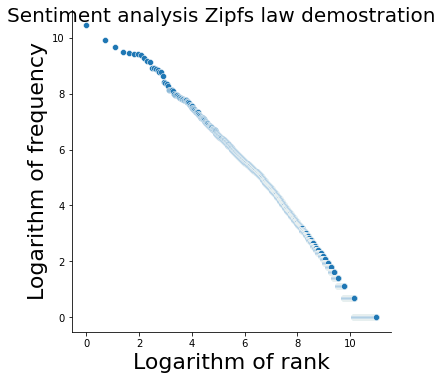

In [ ]:
svoc=json.load(open('svoc.json'))
svoc=collections.Counter(svoc)
sfrq = pd.DataFrame(svoc.most_common(), columns=['token', 'frequency'])

# Index in the sorted list
sfrq['idx'] = sfrq.index + 1

# Plot: Log-log plot for Zipf's law
sfrq['log_frq'] = np.log(sfrq.frequency)
sfrq['log_rank'] = np.log(sfrq['idx'])
ax=seaborn.relplot(x='log_rank', y='log_frq', data=sfrq);
ax.fig.suptitle('Sentiment analysis Zipfs law demostration',fontsize=20)
ax.set_xlabels('Logarithm of rank',fontsize=22)
ax.set_ylabels('Logarithm of frequency',fontsize=22)



In [ ]:
sentiment_corpus = len(senttraintext)
print("Sentiment Corpus:",sentiment_corpus)

Sentiment Corpus: 45615


In [ ]:
sfrq['frequency'][0:10]

0    34846
1    20673
2    15770
3    13129
4    12571
5    12191
6    12169
7    12015
8    10683
9     9668
Name: frequency, dtype: int64

In [ ]:
frq['token'][0:10]

0      @
1    the
2     to
3      a
4    and
5    you
6     of
7     in
8     is
9    for
Name: token, dtype: object

In [ ]:
(len(sfrq.loc[sfrq['frequency']==1])+len(sfrq.loc[sfrq['frequency']==2])+len(sfrq.loc[sfrq['frequency']==3]))/len(sfrq['frequency'])

0.7616890116553258

In [ ]:
(len(frq.loc[frq['frequency']==1])+len(frq.loc[frq['frequency']==2])+len(frq.loc[frq['frequency']==3]))/len(frq['frequency'])

0.7805019391075647

In [ ]:
# svoc=collections.Counter()
# for i in senttraintext:
#     svoc=svoc+collections.Counter(i)

# Task 3: Manual Annotation and Inter-Annotator Agreement

In [ ]:
louis =[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1]
Anastasia = [1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1]
Jesper = [1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,1]
ivan=[1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1]

In [ ]:
path=os.getcwd()
path=path[:-9]+'data/'+'iaa/'+'hate/'+'iaa_text.txt'
iaa=open(path,'r')
tweets=[]
for i in iaa:
    tweets.append(i.strip())

In [ ]:
agreement=np.stack([ivan,louis,Jesper,Anastasia],axis=1)
totalones=[]
for i in agreement:
    if sum(i)==3:
        totalones.append(np.where(i==0))
totalones

[(array([1]),),
 (array([3]),),
 (array([1]),),
 (array([1]),),
 (array([1]),),
 (array([1]),),
 (array([0]),),
 (array([1]),)]

In [ ]:
agreed=0
index=0
for i in agreement:
    if i[0]==i[1] and i[1]==i[2] and i[2]==i[3]:
        agreed+=1
    else:
        print("Did not agree on line:",index,'\n',tweets[index],'\n','ivan:',i[0],'louis:',i[1],'jesper:',i[2],'Anastasia:',i[3],'\n','\n')
    index+=1
print(agreed/120)

Did not agree on line: 3 
 @user you dumb cunt you trick 12 and 30 year old virgins into giving you money you fucking bitch. kys honest… 
 ivan: 1 louis: 0 jesper: 0 Anastasia: 1 
 

Did not agree on line: 11 
 Presidential determination for the number of refugees that COULD be admitted to the US in coming fiscal year "due Sept. 30"? via @user @user #NOMORERefugees #NOmoreSomaliRefugees @user Where the heck r u?? 
 ivan: 0 louis: 0 jesper: 1 Anastasia: 0 
 

Did not agree on line: 12 
 If you say not all men to me you're getting blocked without discussion. 
 ivan: 1 louis: 0 jesper: 1 Anastasia: 0 
 

Did not agree on line: 13 
 @user @user This woman has moved right past the cunt stage straight in to twatdom. 
 ivan: 1 louis: 0 jesper: 0 Anastasia: 1 
 

Did not agree on line: 14 
 I don't care what a bitch think or how a hoe feel 🆗🗣 
 ivan: 1 louis: 0 jesper: 1 Anastasia: 1 
 

Did not agree on line: 15 
 Orban will not take refugees to Hungary and will stop Soros forever. EU dont li

# Task 4: Automatic Prediction

## Hate speech

In [ ]:
hatetrainflat = [" ".join(x) for x in hatetraintext]
hatevalflat = [" ".join(x) for x in hatevaltext]

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(hatetrainflat)

### Baseline model using logistic regression

In [ ]:
baseline_list=[]
accuracy=0
precision=0
recall=0
fscore=0
for i in range(10):
    X = X_train
    Y = hatetrainlabels
    clf = SGDClassifier(loss='log')
    clf.fit(X, Y);

    vectorizerval = CountVectorizer(vocabulary = vectorizer.vocabulary_)
    X = vectorizerval.fit_transform(hatevalflat)
    Y = hatevallabels
    predicted = clf.predict(X);

    results = precision_recall_fscore_support(Y,predicted,average='macro');
    precision = results[0]+precision
    recall = results[1]+recall
    fscore = results[2]+fscore
    accuracy = sum(hatevallabels==predicted)/len(hatevallabels)+accuracy

baseline_list = [accuracy/10,precision/10,recall/10,fscore/10]

print('For the hatespeech detection:','\n','Accuracy:',baseline_list[0],'\n','Precision:',baseline_list[1],'\n','Recall:',baseline_list[2],'\n','F-score:',baseline_list[3])

For the hatespeech detection: 
 Accuracy: 0.7133 
 Precision: 0.7071011753572127 
 Recall: 0.7062052715687596 
 F-score: 0.7064706267454006


In [ ]:
countertest=Counter(hatevallabels)
countertest

Counter({'0': 573, '1': 427})

### Alternative 1: Loss function

In [ ]:
loss_list=["hinge","squared_hinge","modified_huber"] # "log"

precision_1 = 0
recall_1 = 0
fscore_1 = 0
accuracy_1 = 0
loss_results=[]
for j in loss_list:
    precision_1 = 0
    recall_1 = 0
    fscore_1 = 0
    accuracy_1 = 0
    for i in range(10):
        X = X_train
        Y = hatetrainlabels
        clf = SGDClassifier(loss = j)
        clf.fit(X, Y);

        vectorizerval = CountVectorizer(vocabulary = vectorizer.vocabulary_)
        X = vectorizerval.fit_transform(hatevalflat)
        Y = hatevallabels
        predicted=clf.predict(X);
        
        results = precision_recall_fscore_support(Y,predicted,average='macro');
        precision_1 = precision_1+ results[0]
        recall_1 = recall_1+results[1]
        fscore_1 = fscore_1+results[2]
        accuracy_1 = accuracy_1+sum(hatevallabels==predicted)/len(hatevallabels)
    teemp=[accuracy_1/10,precision_1/10,recall_1/10,fscore_1/10]
    loss_results.append(teemp)

print(loss_results)
        


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarni

### Alternative 2: Regulation strength (alpha)

In [ ]:
alpha_list = [0.001,0.01,0.1]
precision_1 = 0
recall_1 = 0
fscore_1 = 0
accuracy_1 = 0
alpha_results = []

for j in alpha_list:
    precision_1 = 0
    recall_1 = 0
    fscore_1 = 0
    accuracy_1 = 0
    for i in range(10):
        X = X_train
        Y = hatetrainlabels
        clf = SGDClassifier(loss = "log",alpha=j)
        clf.fit(X, Y);

        vectorizerval = CountVectorizer(vocabulary = vectorizer.vocabulary_)
        X = vectorizerval.fit_transform(hatevalflat)
        Y = hatevallabels
        predicted=clf.predict(X);
        
        results = precision_recall_fscore_support(Y,predicted,average='macro');
        precision_1 = precision_1+ results[0]
        recall_1 = recall_1+results[1]
        fscore_1 = fscore_1+results[2]
        accuracy_1 = accuracy_1+sum(hatevallabels==predicted)/len(hatevallabels)
        
    teemp=[accuracy_1/10,precision_1/10,recall_1/10,fscore_1/10]
    alpha_results.append(teemp)

print(alpha_results)

[[0.7253999999999999, 0.7214846319483404, 0.7109755549288636, 0.7136147443209244], [0.7013999999999999, 0.7015266175272724, 0.6787253086798191, 0.680689807129691], [0.6814000000000001, 0.7126812883888116, 0.6412533565481809, 0.6312779515677859]]


### Alternative 3: N-gram model

In [ ]:
# Change the n-gram model (MLE)
n_gram_list = [[1,1],[1,2],[1,3],[1,4],[2,2],[2,3]]
n_gram_results = []

for i in n_gram_list:
    precision_3 =0
    recall_3 = 0
    fscore_3 = 0
    accuracy_3 = 0
    for j in range(10):
        X = X_train
        Y = hatetrainlabels
        clf = SGDClassifier(loss='log')
        clf.fit(X, Y);

        vectorizerval = CountVectorizer(vocabulary = vectorizer.vocabulary_,ngram_range = (i[0],i[1]))
        X = vectorizerval.fit_transform(hatevalflat)
        Y = hatevallabels
        predicted = clf.predict(X);

        results=precision_recall_fscore_support(Y,predicted,average = "macro")
        precision_3 = precision_3+ results[0]
        recall_3 = recall_3+results[1]
        fscore_3 = recall_3+results[2]
        accuracy_3 = accuracy_3+sum(hatevallabels==predicted)/len(hatevallabels)

    teemp = []
    teemp.append(accuracy_3/10)
    teemp.append(precision_3/10)
    teemp.append(recall_3/10)
    teemp.append(fscore_3/10)
    n_gram_results.append(teemp)

print(n_gram_results)
#print('For the hatespeech detection:','\n','Accuracy:',accuracy,'\n','Precision:',precision,'\n','Recall:',recall,'\n','F-score:',fscore)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7

### Alternative 4: Other Classifiers

In [ ]:
Other_Classifiers=[1,2]
Other_Classifiers_dict = {1:RandomForestClassifier,2:MultinomialNB}
Other_Classifiers_results = []

for i in Other_Classifiers:
    precision_4 =0
    recall_4 = 0
    fscore_4 = 0
    accuracy_4 = 0
    for j in range(10):
        X = X_train
        Y = hatetrainlabels
        clf_model = Other_Classifiers_dict[i]()
        clf_model.fit(X,Y);

        vectorizerval = CountVectorizer(vocabulary = vectorizer.vocabulary_)
        X = vectorizerval.fit_transform(hatevalflat)
        Y = hatevallabels
        predicted = clf_model.predict(X);

        results=precision_recall_fscore_support(Y,predicted,average = "macro")
        precision_4 =precision_4+ results[0]
        recall_4 = recall_4+results[1]
        fscore_4 = recall_4+results[2]
        accuracy_4 = accuracy_4+sum(hatevallabels==predicted)/len(hatevallabels)

    teemp = []
    teemp.append(accuracy_4/10)
    teemp.append(precision_4/10)
    teemp.append(recall_4/10)
    teemp.append(fscore_4/10)
    Other_Classifiers_results.append(teemp)

print(Other_Classifiers_results)
#print('For the hatespeech detection:','\n','Accuracy:',accuracy,'\n','Precision:',precision,'\n','Recall:',recall,'\n','F-score:',fscore)

KeyboardInterrupt: 

### Model Summary (Hate Speech)

#### Loss Function Summary:

In [ ]:
loss_results_sum = np.array(loss_results).T.tolist()

loss_results_sum = pd.DataFrame(data = loss_results_sum,index=["Accuracy","Precision","Recall","F-Score"])
loss_results_sum.columns = loss_list
loss_results_sum

,hinge,squared_hinge,modified_huber
Accuracy,0.690600,0.687600,0.696300
Precision,0.686720,0.684684,0.693017
Recall,0.689739,0.688315,0.696384
F-Score,0.686988,0.684716,0.693071


#### Regulation strength (alpha) Summary:

In [ ]:
alpha_results_sum = np.array(alpha_results).T.tolist()

alpha_results_sum = pd.DataFrame(data = alpha_results_sum,index=["Accuracy","Precision","Recall","F-Score"])
alpha_results_sum.columns = alpha_list
alpha_results_sum

,0.001,0.010,0.100
Accuracy,0.724500,0.700400,0.682900
Precision,0.720397,0.700085,0.714346
Recall,0.710310,0.678032,0.642920
F-Score,0.712863,0.679980,0.633312


#### N-Gram Summary:

In [ ]:
ind = -1
for i in n_gram_list:
    ind += 1
    new = str(i[0])+","+str(i[1])
    n_gram_list[ind] = new

n_gram_results_sum = np.array(n_gram_results).T.tolist()

n_gram_results_sum = pd.DataFrame(data = n_gram_results_sum,index=["Accuracy","Precision","Recall","F-Score"])
n_gram_results_sum.columns = n_gram_list
n_gram_results_sum

,"1,1","1,2","1,3","1,4","2,2","2,3"
Accuracy,0.712300,0.710200,0.711100,0.710400,0.573000,0.573000
Precision,0.706142,0.704272,0.705183,0.704264,0.286500,0.286500
Recall,0.703990,0.703291,0.705509,0.702123,0.500000,0.500000
F-Score,0.774342,0.774085,0.777180,0.772389,0.536427,0.536427


#### Other Classifiers Summary:

In [ ]:
Other_Classifiers_results_sum = np.array(Other_Classifiers_results).T.tolist()

Other_Classifiers_results_sum = pd.DataFrame(data = Other_Classifiers_results_sum,index=["Accuracy","Precision","Recall","F-Score"])
Other_Classifiers_results_sum.columns = ['Forest','Multinomial']
Other_Classifiers_results_sum

,Forest,Multinomial
Accuracy,0.732000,0.739000
Precision,0.728361,0.734267
Recall,0.717928,0.737343
F-Score,0.789699,0.810868


## Sentiment

In [ ]:
senttrainflat = [" ".join(x) for x in senttraintext]
sentvalflat=[" ".join(x) for x in sentvaltext]

svectorizer = CountVectorizer()
X_train = svectorizer.fit_transform(senttrainflat)

### Baseline model using logistic regression (Multiclass)

In [ ]:
precision =0
recall = 0
fscore = 0
accuracy = 0
for i in range(10):
    X = X_train
    Y = senttrainlabels
    clf = SGDClassifier(loss='log')
    clf.fit(X, Y);

    svectorizerval=CountVectorizer(vocabulary=svectorizer.vocabulary_)
    X = svectorizerval.fit_transform(sentvalflat)
    Y = sentvallabels
    predicted=clf.predict(X);

    results=precision_recall_fscore_support(Y,predicted,average='macro')
    precision=precision+results[0]
    recall=recall+results[1]
    fscore=fscore+results[2]
    accuracy = accuracy+sum(sentvallabels==predicted)/len(sentvallabels)


print('For the sentiment analysis with macro f-score:','\n','Precision:',precision/10,'\n','Recall:',recall/10,'\n','F-score:',fscore/10,'\n','Accuracy:',accuracy/10)

For the sentiment analysis with macro f-score: 
 Precision: 0.6639943166639029 
 Recall: 0.6126765639423867 
 F-score: 0.6272786710806828 
 Accuracy: 0.6734500000000001


### Alternative 1: Loss function

In [ ]:
loss_list = ["hinge","squared_hinge","modified_huber"]
loss_results = []

for i in loss_list:
    precision_1 =0
    recall_1 = 0
    fscore_1 = 0
    accuracy_1 = 0
    for j in range(10):
        X = X_train
        Y = senttrainlabels
        clf = SGDClassifier(loss = i)
        clf.fit(X, Y);
        
        svectorizerval = CountVectorizer(vocabulary = svectorizer.vocabulary_)
        X = svectorizerval.fit_transform(sentvalflat)
        Y = sentvallabels
        predicted = clf.predict(X);
        
        results=precision_recall_fscore_support(Y,predicted,average = "macro")
        precision_1 =precision_1+ results[0]
        recall_1 = recall_1+results[1]
        fscore_1 = recall_1+results[2]
        accuracy_1 = accuracy_1+sum(sentvallabels==predicted)/len(sentvallabels)
    
    teemp = []
    teemp.append(accuracy_1/10)
    teemp.append(precision_1/10)
    teemp.append(recall_1/10)
    teemp.append(fscore_1/10)
    loss_results.append(teemp)


print(loss_results)
#print('For the sentiment analysis with macro f-score:','\n','Precision:',precision,'\n','Recall:',recall,'\n','F-score:',fscore)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarni

### Alternative 2: Regulation strength (alpha)

In [ ]:
# Look more into the alpha parameter...
alpha_list = [0.001,0.01,0.1]
alpha_results = []

for i in alpha_list:
    precision_2 =0
    recall_2 = 0
    fscore_2 = 0
    accuracy_2 = 0
    for j in range(10):
        X = X_train
        Y = senttrainlabels
        clf = SGDClassifier(loss='log', alpha = i)
        clf.fit(X, Y);

        vectorizerval = CountVectorizer(vocabulary = svectorizer.vocabulary_)
        X = vectorizerval.fit_transform(sentvalflat)
        Y = sentvallabels
        predicted = clf.predict(X);

        results=precision_recall_fscore_support(Y,predicted,average = "macro")
        precision_2 =precision_2+ results[0]
        recall_2 = recall_2+results[1]
        fscore_2 = recall_2+results[2]
        accuracy_2 = accuracy_2+sum(sentvallabels==predicted)/len(sentvallabels)

    teemp = []
    teemp.append(accuracy_2/10)
    teemp.append(precision_2/10)
    teemp.append(recall_2/10)
    teemp.append(fscore_2/10)
    alpha_results.append(teemp)

print(alpha_results)
#print('For the hatespeech detection:','\n','Accuracy:',accuracy,'\n','Precision:',precision,'\n','Recall:',recall,'\n','F-score:',fscore)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7

### Alternative 3: N-Gram model

In [ ]:
# Change the n-gram model (MLE)
n_gram_list = [[1,1],[1,2],[1,3],[1,4],[2,2],[2,3]]
n_gram_results = []

for i in n_gram_list:
    precision_3 =0
    recall_3 = 0
    fscore_3 = 0
    accuracy_3 = 0
    for j in range(10):
        X = X_train
        Y = senttrainlabels
        clf = SGDClassifier(loss='log')
        clf.fit(X, Y);

        vectorizerval = CountVectorizer(vocabulary = svectorizer.vocabulary_,ngram_range = (i[0],i[1]))
        X = vectorizerval.fit_transform(sentvalflat)
        Y = sentvallabels
        predicted = clf.predict(X);

        results=precision_recall_fscore_support(Y,predicted,average = "macro")
        precision_3 =precision_3+ results[0]
        recall_3 = recall_3+results[1]
        fscore_3 = recall_3+results[2]
        accuracy_3 = accuracy_3+sum(sentvallabels==predicted)/len(sentvallabels)

    teemp = []
    teemp.append(accuracy_3/10)
    teemp.append(precision_3/10)
    teemp.append(recall_3/10)
    teemp.append(fscore_3/10)
    n_gram_results.append(teemp)

print(n_gram_results)
#print('For the hatespeech detection:','\n','Accuracy:',accuracy,'\n','Precision:',precision,'\n','Recall:',recall,'\n','F-score:',fscore)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7

### Alternative 4: Other Classifiers

In [ ]:
Other_Classifiers=[1,2]
Other_Classifiers_dict = {1:RandomForestClassifier,2:MultinomialNB}
Other_Classifiers_results = []

for i in Other_Classifiers:
    X = X_train
    Y = senttrainlabels
    clf_model = Other_Classifiers_dict[i]()
    clf_model.fit(X=X,y=Y);

    vectorizerval = CountVectorizer(vocabulary = svectorizer.vocabulary_)
    X = vectorizerval.fit_transform(sentvalflat)
    Y = sentvallabels
    predicted = clf_model.predict(X);

    results = precision_recall_fscore_support(Y,predicted,average='macro');
    precision_4 = results[0]
    recall_4 = results[1]
    fscore_4 = results[2]
    accuracy_4 = sum(sentvallabels==predicted)/len(sentvallabels)

    teemp = []
    teemp.append(accuracy_4)
    teemp.append(precision_4)
    teemp.append(recall_4)
    teemp.append(fscore_4)
    Other_Classifiers_results.append(teemp)

print(Other_Classifiers_results)
#print('For the hatespeech detection:','\n','Accuracy:',accuracy,'\n','Precision:',precision,'\n','Recall:',recall,'\n','F-score:',fscore)

[[0.6275, 0.695282403736012, 0.514427379933709, 0.5054296615708095], [0.623, 0.602224390856071, 0.5726363416236834, 0.5817430114662803]]


### Model Summary (Sentiment)

#### Loss Function Summary Multiclass:

In [ ]:
loss_results_sum = np.array(loss_results).T.tolist()

loss_results_sum = pd.DataFrame(data = loss_results_sum,index=["Accuracy","Precision","Recall","F-Score"])
loss_results_sum.columns = loss_list
loss_results_sum.to_latex(buf='table.txt')
loss_results_sum

,hinge,squared_hinge,modified_huber
Accuracy,0.671600,0.575050,0.649650
Precision,0.654543,0.550521,0.631223
Recall,0.628242,0.543951,0.612372
F-Score,0.691951,0.598483,0.674528


#### Regulation strength (alpha) Summary Multiclass:

In [ ]:
alpha_results_sum = np.array(alpha_results).T.tolist()

alpha_results_sum = pd.DataFrame(data = alpha_results_sum,index=["Accuracy","Precision","Recall","F-Score"])
alpha_results_sum.columns = alpha_list
alpha_results_sum.to_latex(buf='table.txt')
alpha_results_sum

,0.001,0.010,0.100
Accuracy,0.642500,0.564000,0.501500
Precision,0.638740,0.538322,0.348254
Recall,0.551763,0.450689,0.391780
F-Score,0.607653,0.493138,0.426726


#### N-Gram Summary Multiclass:

In [ ]:
ind = -1
for i in n_gram_list:
    ind += 1
    new = str(i[0])+","+str(i[1])
    n_gram_list[ind] = new

n_gram_results_sum = np.array(n_gram_results).T.tolist()

n_gram_results_sum = pd.DataFrame(data = n_gram_results_sum,index=["Accuracy","Precision","Recall","F-Score"])
n_gram_results_sum.columns = n_gram_list
n_gram_results_sum.to_latex(buf='table.txt')
n_gram_results_sum

,"1,,","1,,","1,,","1,,","2,,","2,,"
Accuracy,0.674050,0.673600,0.673750,0.674800,0.434500,0.434500
Precision,0.662798,0.663937,0.663636,0.664544,0.144833,0.144833
Recall,0.613281,0.613275,0.612938,0.614284,0.333333,0.333333
F-Score,0.676509,0.676109,0.675545,0.676224,0.353526,0.353526


#### Other Classifiers Summary Multiclass:

In [ ]:
Other_Classifiers_results_sum = np.array(Other_Classifiers_results).T.tolist()

Other_Classifiers_results_sum = pd.DataFrame(data = Other_Classifiers_results_sum,index=["Accuracy","Precision","Recall","F-Score"])
Other_Classifiers_results_sum.columns = ['Forest','Multinomial']
Other_Classifiers_results_sum.to_latex(buf='table.txt')
Other_Classifiers_results_sum

,Forest,Multinomial
Accuracy,0.627500,0.623000
Precision,0.695282,0.602224
Recall,0.514427,0.572636
F-Score,0.505430,0.581743


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7b2c9380-f1db-4912-9a67-96bd866cc175' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>